In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/personalized_learning_dataset.csv')
print(df.head())

  Student_ID  Age  Gender Education_Level       Course_Name  \
0     S00001   15  Female     High School  Machine Learning   
1     S00002   49    Male   Undergraduate     Python Basics   
2     S00003   20  Female   Undergraduate     Python Basics   
3     S00004   37  Female   Undergraduate      Data Science   
4     S00005   34  Female    Postgraduate     Python Basics   

   Time_Spent_on_Videos  Quiz_Attempts  Quiz_Scores  Forum_Participation  \
0                   171              4           67                    2   
1                   156              4           64                    0   
2                   217              2           55                    2   
3                   489              1           65                   43   
4                   496              3           59                   34   

   Assignment_Completion_Rate Engagement_Level  Final_Exam_Score  \
0                          89           Medium                51   
1                          9

In [2]:
print(df.info())
df = df.query("Gender != 'Other'")
df['Gender'].value_counts()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Student_ID                  10000 non-null  object
 1   Age                         10000 non-null  int64 
 2   Gender                      10000 non-null  object
 3   Education_Level             10000 non-null  object
 4   Course_Name                 10000 non-null  object
 5   Time_Spent_on_Videos        10000 non-null  int64 
 6   Quiz_Attempts               10000 non-null  int64 
 7   Quiz_Scores                 10000 non-null  int64 
 8   Forum_Participation         10000 non-null  int64 
 9   Assignment_Completion_Rate  10000 non-null  int64 
 10  Engagement_Level            10000 non-null  object
 11  Final_Exam_Score            10000 non-null  int64 
 12  Learning_Style              10000 non-null  object
 13  Feedback_Score              10000 non-null  int

In [3]:
df.describe()

,Age,Time_Spent_on_Videos,Quiz_Attempts,Quiz_Scores,Forum_Participation,Assignment_Completion_Rate,Final_Exam_Score,Feedback_Score
count,9585.000000,9585.000000,9585.000000,9585.000000,9585.000000,9585.000000,9585.000000,9585.000000
mean,32.144914,255.604799,2.500574,64.633490,24.634742,69.539802,64.742619,3.012207
std,10.060853,141.413778,1.122516,20.274523,14.322980,17.357911,20.044473,1.421850
min,15.000000,10.000000,1.000000,30.000000,0.000000,40.000000,30.000000,1.000000
25%,24.000000,132.000000,1.000000,47.000000,12.000000,54.000000,48.000000,2.000000
50%,32.000000,258.000000,3.000000,65.000000,25.000000,69.000000,65.000000,3.000000
75%,41.000000,378.000000,4.000000,83.000000,37.000000,85.000000,82.000000,4.000000
max,49.000000,499.000000,4.000000,99.000000,49.000000,99.000000,99.000000,5.000000


Text(0, 0.5, 'Частота')

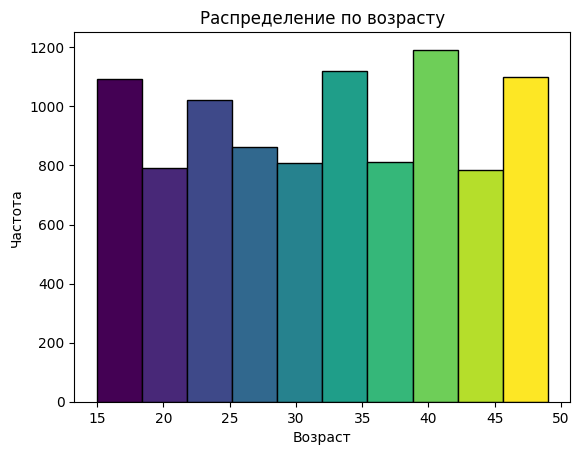

In [5]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
ages = df['Age']
n, bins, patches = plt.hist(ages, edgecolor='black')
colors = plt.cm.viridis(np.linspace(0, 1, len(bins)-1))
for i in range(len(patches)):
    patches[i].set_facecolor(colors[i])
plt.title('Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Частота')

<ipython-input-6-134dc32bf8ad>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_completion_rate.index, y=mean_completion_rate.values, palette=colors)


Text(0, 0.5, 'Среднее время (минуты)')

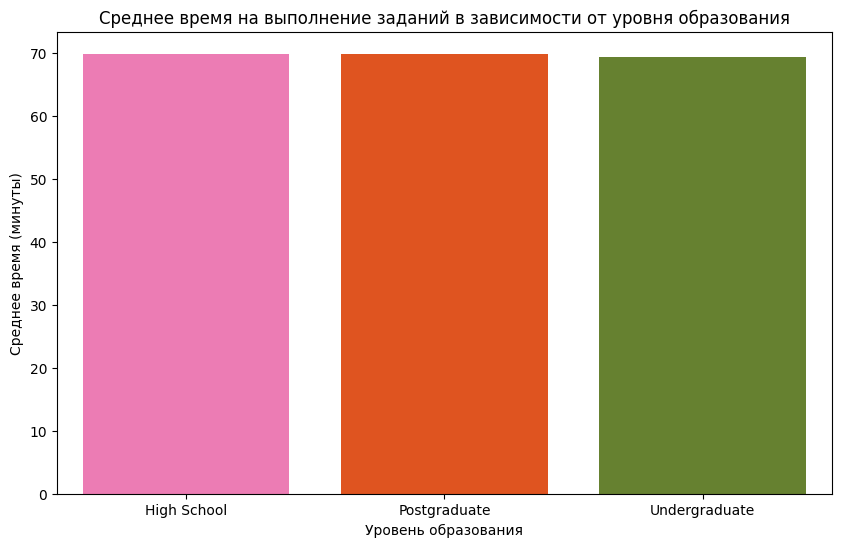

In [6]:
mean_completion_rate = df.groupby('Education_Level')['Assignment_Completion_Rate'].mean()
colors = ['#FF69B4', '#FF4500', '#6B8E23']
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_completion_rate.index, y=mean_completion_rate.values, palette=colors)

plt.title('Среднее время на выполнение заданий в зависимости от уровня образования')
plt.xlabel('Уровень образования')
plt.ylabel('Среднее время (минуты)')

Text(0, 0.5, 'Средний балл')

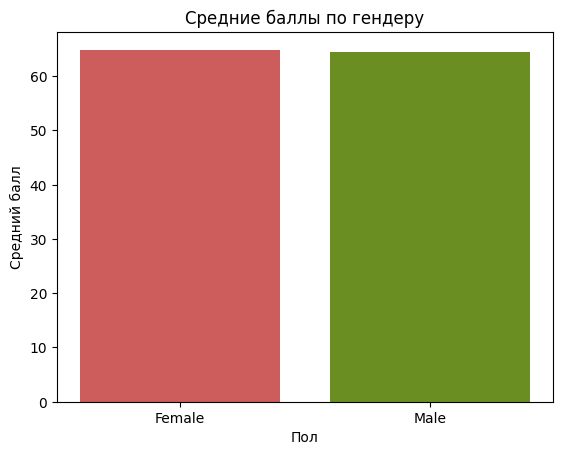

In [7]:
grouped_data = df.groupby('Gender')[['Quiz_Scores']].mean()
categories = grouped_data.index
values = grouped_data['Quiz_Scores']
colors = ['#CD5C5C', '#6B8E23']
fig, ax = plt.subplots()
ax.bar(categories, values, color=colors)
ax.set_title('Средние баллы по гендеру')
ax.set_xlabel('Пол')
ax.set_ylabel('Средний балл')

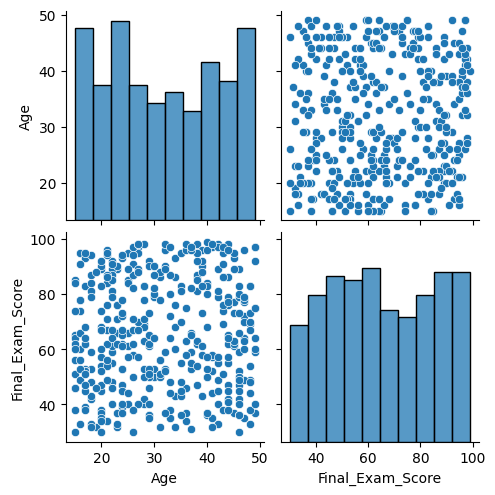

In [8]:
fs = df.iloc[:400][['Age', 'Final_Exam_Score']]
sns_plot = sns.pairplot(fs)

Text(0, 0.5, 'Плотность')

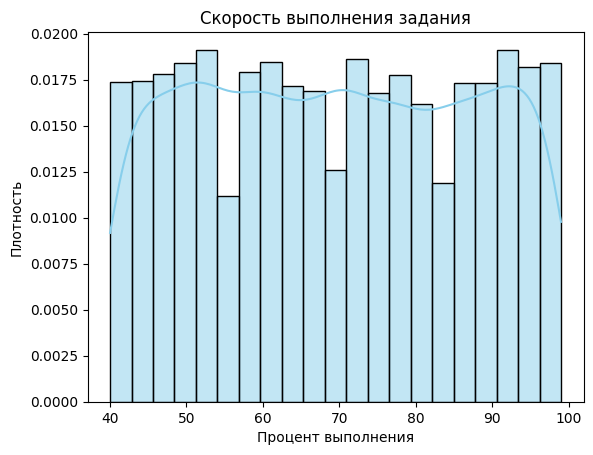

In [9]:
sns.histplot(df['Assignment_Completion_Rate'], kde=True, color='skyblue', stat='density')
plt.title('Скорость выполнения задания')
plt.xlabel('Процент выполнения')
plt.ylabel('Плотность')

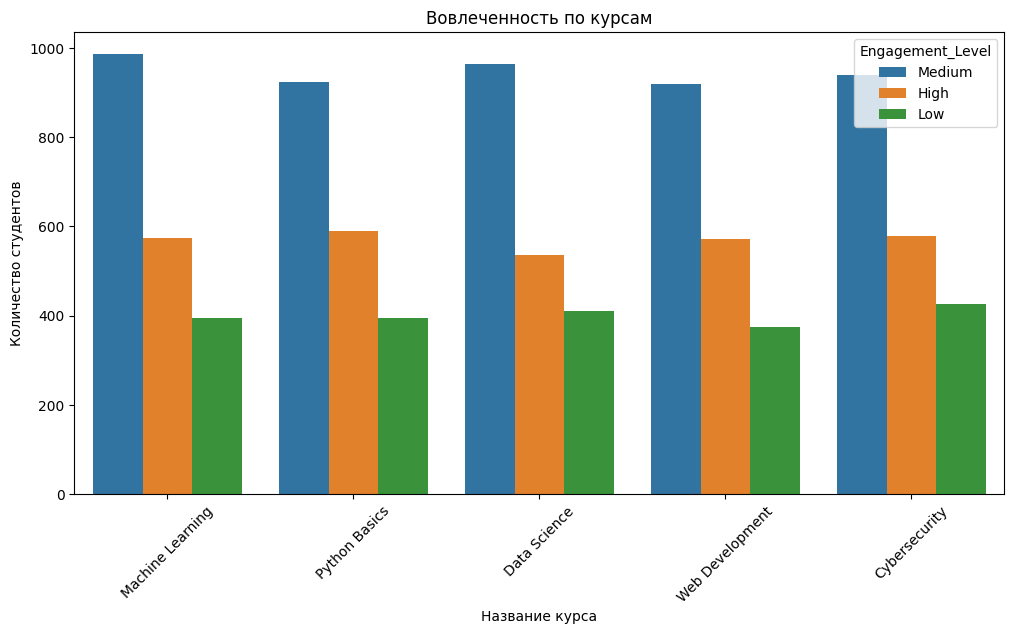

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Course_Name', hue='Engagement_Level', data=df)
plt.title('Вовлеченность по курсам')
plt.xlabel('Название курса')
plt.ylabel('Количество студентов')
plt.xticks(rotation=45)
plt.show()

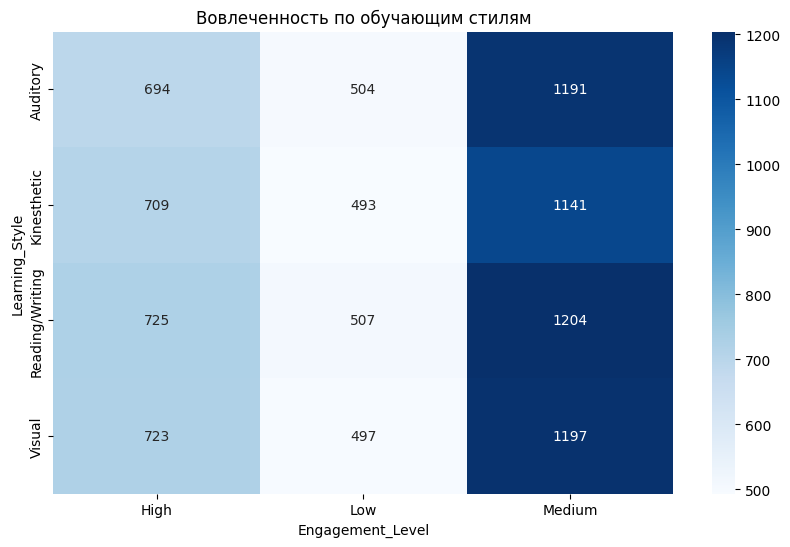

In [11]:
engagement_by_style = pd.crosstab(df['Learning_Style'], df['Engagement_Level'])
plt.figure(figsize=(10, 6))
sns.heatmap(engagement_by_style, annot=True, cmap='Blues', fmt='d')
plt.title('Вовлеченность по обучающим стилям')
plt.show()

Text(0, 0.5, 'Результаты финального экзамена')

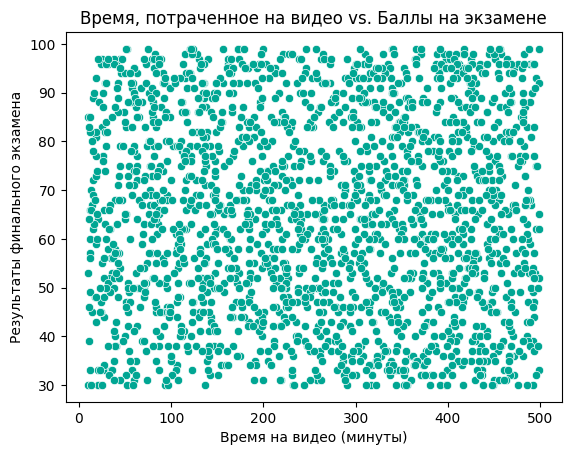

In [45]:
sns.scatterplot(x='Time_Spent_on_Videos', y='Final_Exam_Score', color = '#00a693', data=df.head(2000))
plt.title('Время, потраченное на видео vs. Баллы на экзамене')
plt.xlabel('Время на видео (минуты)')
plt.ylabel('Результаты финального экзамена')

<ipython-input-43-e05fef6c7be5>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.head(500), x='Forum_Participation', y='Final_Exam_Score', palette='coolwarm')


<Axes: xlabel='Forum_Participation', ylabel='Final_Exam_Score'>

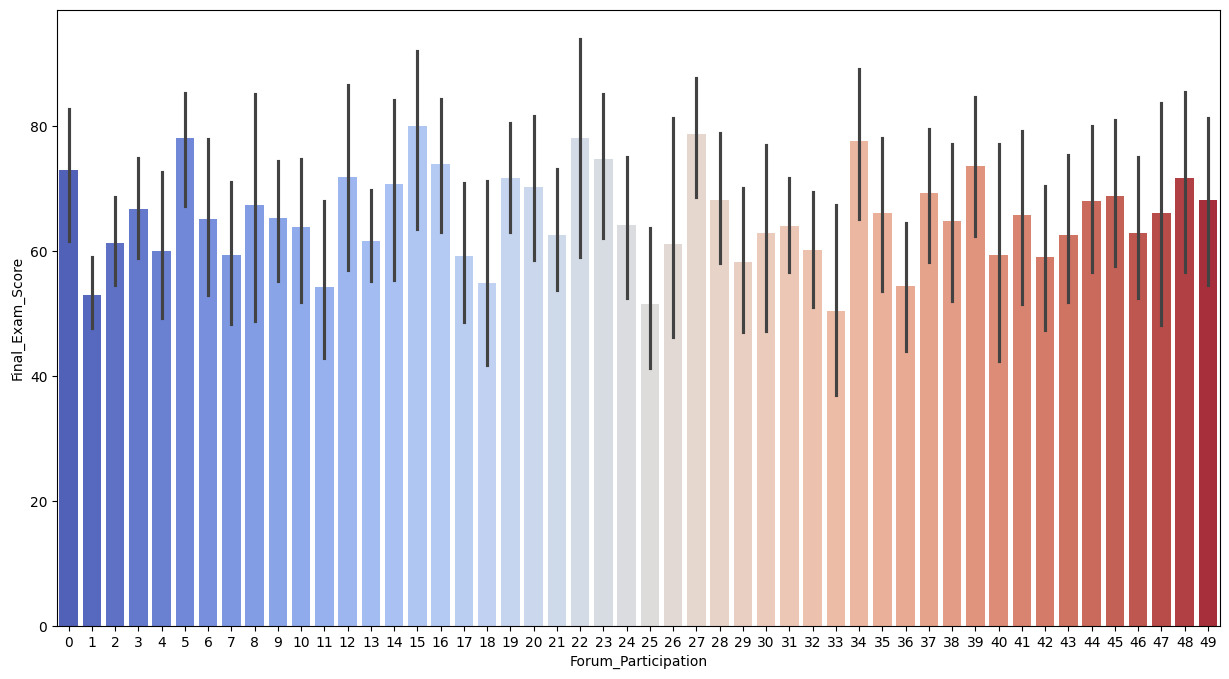

In [43]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df.head(500), x='Forum_Participation', y='Final_Exam_Score', palette='coolwarm')

Text(0, 0.5, 'Средний балл на экзамене')

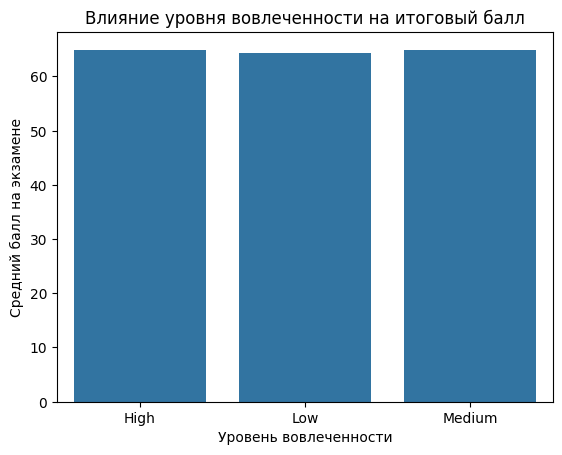

In [34]:
mean_scores = df.groupby('Engagement_Level')['Final_Exam_Score'].mean().reset_index()

sns.barplot(data=mean_scores, x='Engagement_Level', y='Final_Exam_Score')
plt.title('Влияние уровня вовлеченности на итоговый балл')
plt.xlabel('Уровень вовлеченности')
plt.ylabel('Средний балл на экзамене')

Text(0, 0.5, 'Баллы на экзамене')

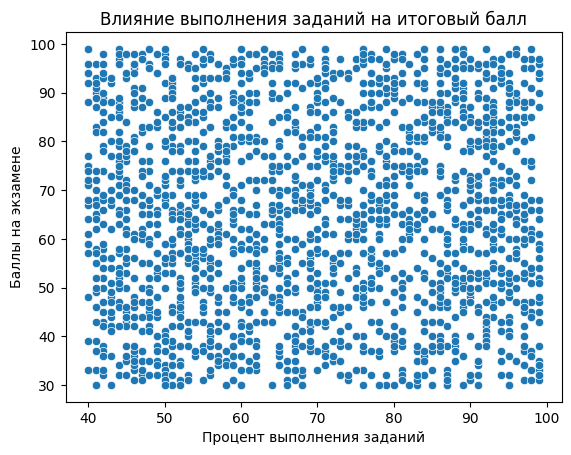

In [38]:
sns.scatterplot(data=df.head(2000), x='Assignment_Completion_Rate', y='Final_Exam_Score')
plt.title('Влияние выполнения заданий на итоговый балл')
plt.xlabel('Процент выполнения заданий')
plt.ylabel('Баллы на экзамене')